In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
from sim_data_vis import *
import seaborn as sns

In [4]:
filepath = '../data/'
filename = filepath + 'simu_meteor_mag5_L3.txt'

TypeError: __init__() got an unexpected keyword argument 'fmt'

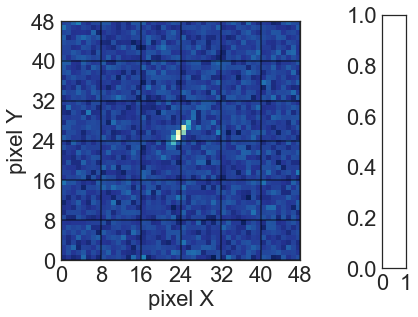

In [5]:
# make standard plot
sns.set_style("white")
sns.set_context("paper", rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":22,
                             "xtick.labelsize":22, "ytick.labelsize":22})
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['savefig.dpi'] = 500

with SimDataVis(filename) as FileVis:
    FileVis.data_level = 1
    FileVis.plot_pdm_sum()
    plt.savefig('/Users/Fran/Downloads/meteor.png', bbox_inches='tight')

In [ ]:
filepath = '../data/'
filename = filepath + 'uhecr_sim_10_23.txt'

In [ ]:
# make animated gif
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['savefig.dpi'] = 500

with SimDataVis(filename) as FileVis:
    FileVis.data_level = 3
    FileVis._read_data()
    n_gtu = FileVis.n_gtu    

    #initialise
    gtu_num = 0
    fig = plt.figure(facecolor = None)
    ax = fig.add_subplot(111)
    init_frame = FileVis.pdm_data[gtu_num]
    cmap = plt.cm.get_cmap("YlGnBu_r")
    im = plt.imshow(init_frame, cmap = cmap,
                    animated = True, origin = 'lower')
    
    # Set ticks
    major_ticks = np.arange(-.5, 48, 8)
    minor_ticks = np.arange(-.5, 48, 1)
    #ax.set_xlim(0.0,47.0)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_xticklabels(np.arange(0, 49, 8));
    ax.set_yticklabels(np.arange(0, 49, 8));
    
    # Set grid
    #ax.grid(which='minor', alpha=0.2)
    ax.grid(color='k', linestyle='-', linewidth=2)
    ax.grid(which='major', alpha=0.4)

    cbar=plt.colorbar()
    cbar.set_label('counts', x = 1.2)
    cbar.formatter.set_powerlimits((0, 0))
    
    def updatefig(*args):
        global frame, gtu_num
        gtu_num += 1
        frame = FileVis.pdm_data[gtu_num]
        im.set_array(frame)
        plt.title('t = ' + str(gtu_num*0.041) + ' [s]')
        return im,

    # animation
    anim = animation.FuncAnimation(fig, updatefig, frames = n_gtu - 3, 
                               interval = 200, blit = False)

    anim.save("/Users/fran/Downloads/uhecr.mp4")
    #HTML(anim.to_html5_video())
